# Road Lane segmentation from video

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_coordinates(event, x, y, flags, params):
    """With the help of this function, we can get the coordinates of the desired points from the image."""
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f'({x},{y})')
        cv2.putText(frame, f'({x},{y})',(x,y),
        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.circle(frame, (x,y), 3, (0,255,255), -1)

In [3]:
def ROI(image, vertices):
    """This function crops the region of interest."""
    
    mask = np.zeros_like(image)
    match_mask_color = 255
    cv2.fillPoly(mask, np.int32([vertices]), match_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [4]:
vid_capture = cv2.VideoCapture('road.webm')

In [5]:
if (vid_capture.isOpened() == False):
    print("Error opening the video file")
else:
    fps = vid_capture.get(5)
    print('Frames per second : ', fps,'FPS')
    frame_width = int(vid_capture.get(3))
    print('Frames width : ', frame_width)
    frame_height = int(vid_capture.get(4))
    print('Frames height : ', frame_height)
    frame_count = vid_capture.get(7)
    print('Frame count : ', frame_count)

Frames per second :  23.976023976023978 FPS
Frames width :  596
Frames height :  336
Frame count :  522.0


## For one frame

In [6]:
ret, frame = vid_capture.read()

In [13]:
# Getting the coordinates of each point
cv2.namedWindow('Frame')
cv2.setMouseCallback('Frame', get_coordinates)

while True:
    cv2.imshow('Frame',frame)
    if cv2.waitKey(1) == 13:
        # 13 is the Enter Key
        break
        
vid_capture.release()
cv2.destroyAllWindows()

(1,317)
(226,70)
(380,72)
(585,332)


In [7]:
frame_height

336

In [8]:
frame_width

596

In [9]:
points = np.array([[1,336], [226,72], [380,72], [596,336]])

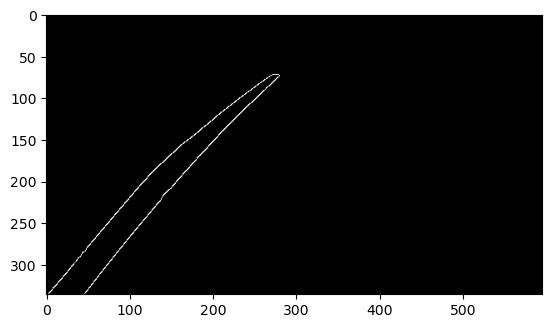

In [10]:
# Converting each frame to grayscale
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Cropping the region of interest
mask_img = ROI(gray_frame, points)

# Blurring each frame
blur_frame = cv2.GaussianBlur(mask_img, (5,5), 0)

# Filtering the colors of each frame
_, thresh_frame = cv2.threshold(blur_frame,150,255,cv2.THRESH_BINARY)

# Detecting the edges
edge_frame = cv2.Canny(thresh_frame, 100, 200)

plt.imshow(edge_frame , cmap="gray")

## For video

In [11]:
vid_capture = cv2.VideoCapture('road.webm')

# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output = cv2.VideoWriter('output.mp4', -1, fps, (frame_width,frame_height))

In [12]:
points = np.array([[1,336], [226,72], [380,72], [596,336]])

In [13]:
while(vid_capture.isOpened()):
    ret, frame = vid_capture.read()        
    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        mask_img = ROI(gray_frame, points)
        blur_frame = cv2.GaussianBlur(mask_img, (5,5), 0)
        _, thresh_frame = cv2.threshold(blur_frame,150,255,cv2.THRESH_BINARY)
        edge_frame = cv2.Canny(thresh_frame, 100, 200)
        
        output.write(edge_frame)
        cv2.imshow('Frame', edge_frame)

        key = cv2.waitKey(25)
        if key == ord('q'):
            break
    else:
        break


vid_capture.release()
output.release()
cv2.destroyAllWindows()